In [1]:
import pandas as pd
import numpy as np

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
%matplotlib inline 

In [7]:
customers = pd.read_csv('Ecommerce Customers')
customers.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [9]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


### Use seaborn to create a jointplot to compare the Time on Website and Yearly Amount Spent columns. Does the correlation make sense?

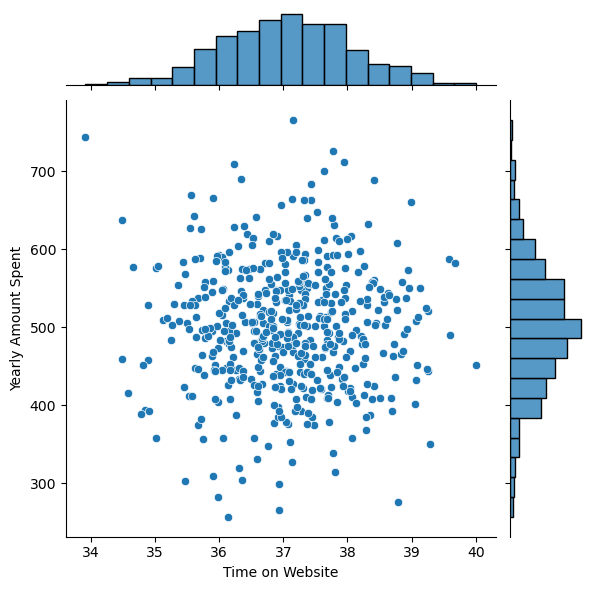

In [11]:
sns.jointplot(data=customers, x='Time on Website', y='Yearly Amount Spent')

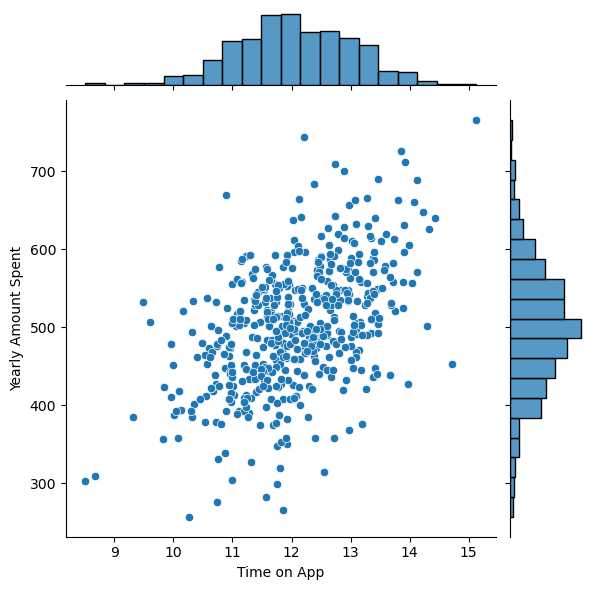

In [14]:
sns.jointplot(data=customers, x='Time on App', y='Yearly Amount Spent')

### Create a linear model plot of Yearly amount spent vs Lenth of Membership

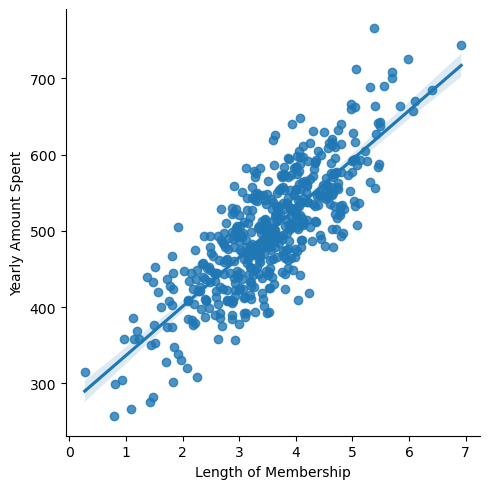

In [16]:
sns.lmplot(x='Length of Membership', y='Yearly Amount Spent', data=customers)

In [19]:
customers.columns

Index(['Email', 'Address', 'Avatar', 'Avg. Session Length', 'Time on App',
       'Time on Website', 'Length of Membership', 'Yearly Amount Spent'],
      dtype='object')

In [29]:
y = customers['Yearly Amount Spent']

In [27]:
X = customers[['Avg. Session Length', 'Time on App','Time on Website','Length of Membership']]

In [31]:
from sklearn.model_selection import train_test_split

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

### Import LinearRegression from sklearn.linear_model

In [38]:
from sklearn.linear_model import LinearRegression

### Create an instance of a LinearRegression() model named In

In [42]:
lm = LinearRegression()

### Train/fit lm on the training data

In [44]:
lm.fit(X_train, y_train)

LinearRegression()

### Print out the coefficients of the model

In [48]:
lm.coef_

array([25.98154972, 38.59015875,  0.19040528, 61.27909654])

### Predicting Test Data

Use lm.predict() to predict off the X_test set of data

In [51]:
predictions = lm.predict(X_test)

In [58]:
#predictions

### Create a scatterplot of the real test values versus the predicted values

Text(0, 0.5, 'Predicted Values')

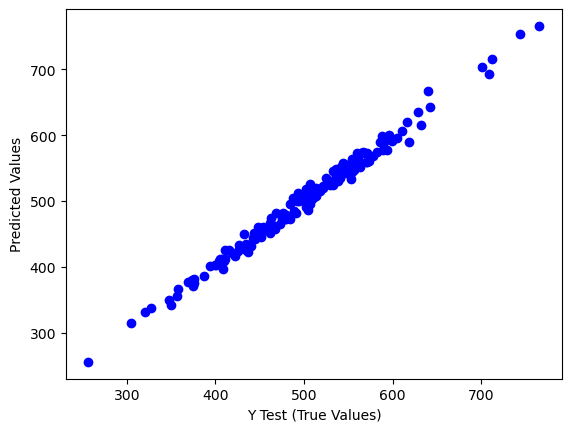

In [64]:

plt.scatter(y_test, predictions, c='blue')
plt.xlabel('Y Test (True Values)')
plt.ylabel('Predicted Values')

### Calculate the Mean Absolute Error, Mean Squared Error, and the Root Mean Squared Error.

In [67]:
from sklearn import metrics

In [75]:
print('MAE ', metrics.mean_absolute_error(y_test,predictions))
print('MSE ', metrics.mean_squared_error(y_test,predictions))
print('RMSE' , np.sqrt(metrics.mean_squared_error(y_test,predictions)))


MAE  7.228148653430838
MSE  79.81305165097451
RMSE 8.933815066978637


C:\Users\USER\anaconda3\envs\data_env_old\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Yearly Amount Spent', ylabel='Density'>

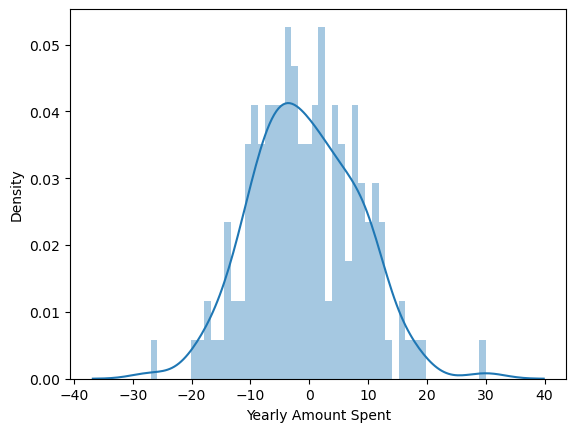

In [77]:
sns.distplot((y_test-predictions), bins=50)

In [81]:
cdf = pd.DataFrame(lm.coef_,X.columns, columns=['Coeff'])
cdf

,Coeff
Avg. Session Length,25.981550
Time on App,38.590159
Time on Website,0.190405
Length of Membership,61.279097
